In [1081]:
import numpy as np
import time

# 4

# Jacobi iterative matrix

In [1082]:
def Mj(A:np.array):
  L = np.tril(A,k=-1)
  D = np.diagflat(np.diag(A))
  U = np.triu(A,k=1)
  return -(np.linalg.inv(D))@(L+U)

# Gauss seidel iterative matrix

In [1083]:
def Mgs(A):
  D = np.diagflat(np.diag(A))
  L = np.tril(A,k=-1)
  U = np.triu(A,k=+1)
  return -np.linalg.inv(L+D)@U

# Spectral Radius

In [1084]:
def rho(M):
  eigenvalues = np.linalg.eigvals(M)
  norms = np.abs(eigenvalues)
  return max(norms)

# Forming the tridiagonal matrix A

In [1085]:
upper_diagonal = np.ones(3)
lower_diagonal = np.ones(3)
min_sp = 0
min_c = 3
A = np.zeros((4,4))+ np.diag(upper_diagonal, k=1) + np.diag(lower_diagonal, k=-1)

# 4.b

# Jacobi method

In [1086]:
for c in np.arange(2.0, 0.0, -0.001):
    np.fill_diagonal(A, c)
    spectral_radius = rho(Mj(A))
    if spectral_radius<1 and c<min_c:
        min_c = c
        min_sp = spectral_radius
min_c

1.619000000000042

# 4.c

# Gauss seidel method

In [1087]:
for c in np.arange(2.0, 0.0, -0.001):
    np.fill_diagonal(A, c)
    spectral_radius = rho(Mgs(A))
    if spectral_radius<1 and c<min_c:
        min_c = c
        min_sp = spectral_radius
min_c

1.619000000000042

# 7

# 7.a

# SOR iterative matrix

In [1088]:
def Msor(A:np.array,w):
  L = np.tril(A,k=-1)
  U = np.triu(A,k=1)
  D=np.zeros((len(A),len(A)))
  np.fill_diagonal(D,np.diag(A))

  return np.linalg.inv(D+(w*L))@((1-w)*D-(w*U))

In [1089]:
A = np.array([[3,1,0,-1],
              [1,3,1,0],
              [0,1,3,1],
              [-1,0,1,3]])

b = np.array([1,2,0,-1])

W(opt):  1.1


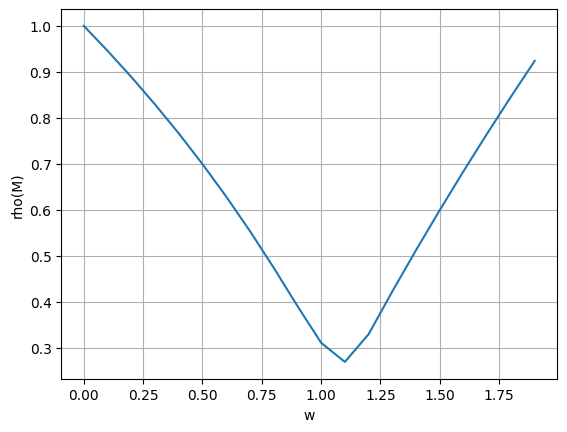

In [1090]:
import matplotlib.pyplot as plt

rho_values = []
w_values = np.arange(0, 2, 0.1)

rho_min = 10
w_opt = 10

for w in w_values:
  output = rho(Msor(A,w))
  if output < rho_min:
    rho_min = output
    w_opt = w
  rho_values.append(output)

print("W(opt): ",w_opt)

plt.plot(w_values, rho_values)
plt.xlabel('w')
plt.ylabel('rho(M)')
plt.grid(True)
plt.show()

# 7.b

In [1091]:
def SOR(A,b,w, max_iter=100):
  # initial guess
  x = np.zeros((len(A),1))

  for _ in range(max_iter):
      for i in range(len(A)):
          x[i] = np.round(x[i] +(w * (b[i] - np.dot(A[i,:],x))) / A[i,i],decimals=6)

  return x

start_time = time.time()
print("Answer:\n", SOR(A,b,w_opt).T)
end_time = time.time()

Answer:
 [[ 0.        0.714286 -0.142857 -0.285714]]


In [1092]:
print(end_time-start_time, "sec")

0.011789560317993164 sec


# 7.c

In [1093]:
start = time.time()
print("Answer:\n", np.round(np.linalg.solve(A,b),decimals=6))
end = time.time()

Answer:
 [-0.        0.714286 -0.142857 -0.285714]


In [1094]:
print(end-start, "sec")

0.0019979476928710938 sec


## It is clearly known that the prepared instructions solve the system of equations faster than the SOR method even when we have used the optimal w.

# 8

# 8.a

In [1095]:
A = np.diag(5*np.ones(1000))+np.diag(-1*np.ones(999),k=-1)+ np.diag(-1*np.ones(999),k=1)
A[0,-1] +=1
A[-1,0] +=1
b = np.ones(1000)
A

array([[ 5., -1.,  0., ...,  0.,  0.,  1.],
       [-1.,  5., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  5., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  5., -1.],
       [ 1.,  0.,  0., ...,  0., -1.,  5.]])

# Gauss elimination method

In [1096]:
def Gauss_elimination_method(A,b):
    # Elimination
    A_augmented = np.column_stack((A, b))
    for i in range(len(A)):
        for row in range(i+1,len(A)):
            multiplier = - A_augmented[row,i] / A_augmented[i,i]
            A_augmented[row,:] += multiplier * A_augmented[i,:]

    A = A_augmented[:,:len(A)]
    b = A_augmented[:,-1]

    # Backward substitution
    n = len(b)
    x = np.zeros(n)
    sum=0
    for i in range(n-1,-1,-1):
        for j in range(n):
            if j != i:
                sum += A[i,j]*x[j]
        x[i] = (b[i]-sum)/A[i,i]
        sum=0
    return x

In [1097]:
start = time.time()
x = Gauss_elimination_method(A, b)
end = time.time()

print(end - start, "sec")

2.628551721572876 sec


In [1098]:
x

array([0.21821789, 0.30930734, 0.32831882, 0.33228674, 0.3331149 ,
       0.33328774, 0.33332382, 0.33333135, 0.33333292, 0.33333325,
       0.33333332, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

In [1099]:
start = time.time()
x = np.linalg.solve(A,b)
end = time.time()

print(end - start, "sec")

0.036405324935913086 sec


In [1100]:
x

array([0.21821789, 0.30930734, 0.32831882, 0.33228674, 0.3331149 ,
       0.33328774, 0.33332382, 0.33333135, 0.33333292, 0.33333325,
       0.33333332, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

# 8.b

In [1101]:
A = np.diag(5*np.ones(1000)) + np.diag(-1*np.ones(999),k=-1) + np.diag(-1*np.ones(999),k=1)
A[0,-1] += 1
A[-1,0]+= 1
b = np.ones(1000)

In [1102]:
def Gauss_Seidel(A,b,tolerance = 1e-14):

    x = np.zeros((len(A),1))
    iteration = 0

    while(np.linalg.norm(b-A@x)/np.linalg.norm(b) > tolerance):
        for i in range(len(A)):
            x[i] = x[i] + ((b[i]-np.dot(A[i,:],x))/A[i,i])
        iteration += 1

    return x,iteration

In [1103]:
start = time.time()
x ,iteration = Gauss_Seidel(A,b)
end = time.time()

print(iteration)
print(end-start, "sec")

26
0.3733842372894287 sec


In [1104]:
x

array([[0.21821789],
       [0.30930734],
       [0.32831882],
       [0.33228674],
       [0.3331149 ],
       [0.33328774],
       [0.33332382],
       [0.33333135],
       [0.33333292],
       [0.33333325],
       [0.33333332],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.333

In [1105]:
start = time.time()
x = np.linalg.solve(A,b)
end = time.time()

print(end - start, "sec")

0.032056331634521484 sec


In [1106]:
x

array([0.21821789, 0.30930734, 0.32831882, 0.33228674, 0.3331149 ,
       0.33328774, 0.33332382, 0.33333135, 0.33333292, 0.33333325,
       0.33333332, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

In [1107]:
def Jacobi(A,b,tolerance = 1e-14):
    # initial guess
    x = np.zeros((len(A),1))
    x_old = np.copy(x)
    iteration = 0

    while(np.linalg.norm(b-A@x)/np.linalg.norm(b) > tolerance):
        for i in range(len(A)):
            Sigma = np.dot(A[i,:],x_old)
            x[i] = x_old[i] + ((b[i] - np.dot(A[i,:],x_old))/A[i,i])
        x_old = np.copy(x)
        iteration += 1

    return x, iteration

In [1108]:
start = time.time()
x ,iteration = Jacobi(A,b)
end = time.time()

print(iteration)
print(end - start, "sec")

39
0.6906867027282715 sec


In [1109]:
x

array([[0.21821789],
       [0.30930734],
       [0.32831882],
       [0.33228674],
       [0.3331149 ],
       [0.33328774],
       [0.33332382],
       [0.33333135],
       [0.33333292],
       [0.33333325],
       [0.33333332],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.333

# 8.c

In [1110]:
def extraction(A):
    m,n = np.shape(A)
    a = np.zeros((n,1))
    b = np.zeros((n,1))
    c = np.zeros((n,1))

    a[1] = A[1][0]
    b[0] = A[0][0]
    b[n-1] = A[n-1][n-1]
    c[n-2] = A[n-2][n-1]

    for j in range(1,n-1):
        a[j+1]=A[j+1][j]
        b[j]=A[j][j]
        c[j-1]=A[j-1][j]

    return a,b,c

In [1111]:
def thomas_algorithm(A:np.array, f:np.array):
    m,n = np.shape(A)

    x = np.zeros((n,1))
    y = np.zeros((n,1))
    alpha = np.zeros((n,1))
    beta = np.zeros((n,1))

    a,b,c = extraction(A)

    alpha[0] = b[0]

    for i in range(1,n):
        beta[i] = a[i] / alpha[i-1]
        alpha[i] = b[i] - (beta[i] * c[i-1])

    y[0] = f[0]

    for i in range(1,n):
        y[i] = f[i] - beta[i]*y[i-1]

    x[n-1] = y[n-1]/alpha[n-1]

    for i in range(1,n):
        x[n-1-i] = (y[n-1-i] - (c[n-1-i]*x[n-i]))/alpha[n-1-i]

    return x

In [1112]:
def Sherman_Morrison(A,b):
    size,_ = np.shape(A)
    u = np.zeros(size)
    v = np.zeros(size)
    A[0,0]-=1
    A[size-1,size-1]-=1
    u[0] , u[size-1] = 1, A[size-1,0]
    v[0] , v[size-1] = 1, A[0,size-1]

    y = thomas_algorithm(A,b)
    w = thomas_algorithm(A,u)
    x = y - w*(np.dot(v,y)/(1+np.dot(v,w)))

    return x

In [1113]:
start = time.time()
print(Sherman_Morrison(A,b))
end = time.time()

[[0.21821789]
 [0.30930734]
 [0.32831882]
 [0.33228674]
 [0.3331149 ]
 [0.33328774]
 [0.33332382]
 [0.33333135]
 [0.33333292]
 [0.33333325]
 [0.33333332]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33

In [1114]:
print(end - start, "sec")

0.04613685607910156 sec


In [1115]:
start = time.time()
x = np.linalg.solve(A,b)
end = time.time()

In [1116]:
x

array([0.26376262, 0.31881308, 0.33030278, 0.33270082, 0.33320132,
       0.33330578, 0.33332758, 0.33333213, 0.33333308, 0.33333328,
       0.33333332, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

In [1117]:
print(end - start, "sec")

0.05362558364868164 sec


# Sherman Morrison algorithm is faster than the algorithms of parts a and b.